# Data generator for Gerchberg-saxton Algorithm
## The optics based ML model will be simulated for comparison then tested empirically 

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
import math 

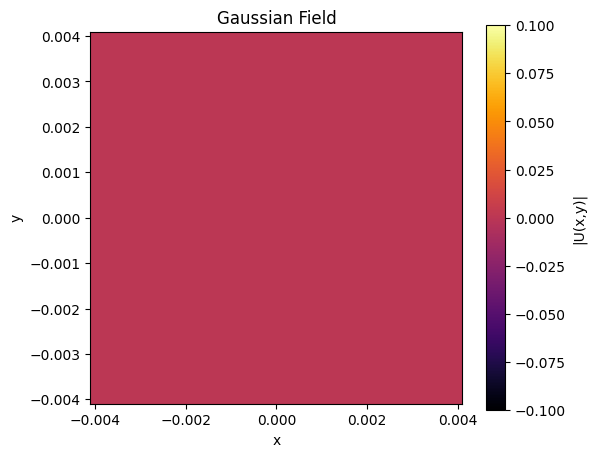

In [ ]:
"""
Define spatial grid
"""

N = 2**10 # pixel resolution
dx = 8e-6 # pixel size
x = np.linspace(-N/2*dx, N/2*dx, N) # spatial axis
y = np.linspace(-N/2*dx, N/2*dx, N) # spatial axis
[X, Y] = np.meshgrid(x, y) # spatial grid
Rho = np.sqrt(X**2 + Y**2) # radial coordinate
Phi = np.arctan2(Y, X) # angular coordinate

"""
Define Gaussian field
"""

sigma = 5e-4   # width parameter (adjust to see effect)

U = np.exp(-(X**2 + Y**2) / sigma**2)

"""
Plot Gaussian field
"""

plt.figure(figsize=(6,5))
plt.imshow(np.angle(U), extent=[x.min(), x.max(), y.min(), y.max()], cmap="inferno")
plt.title("Gaussian Field")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="|U(x,y)|")
plt.show()



# Zernike polynomials

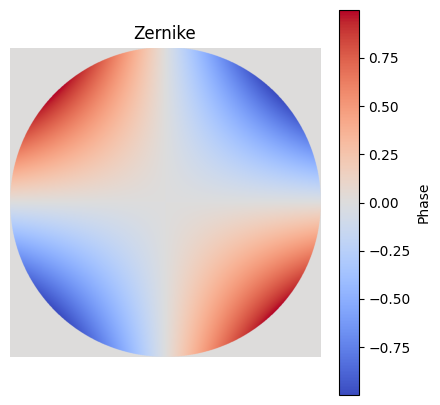

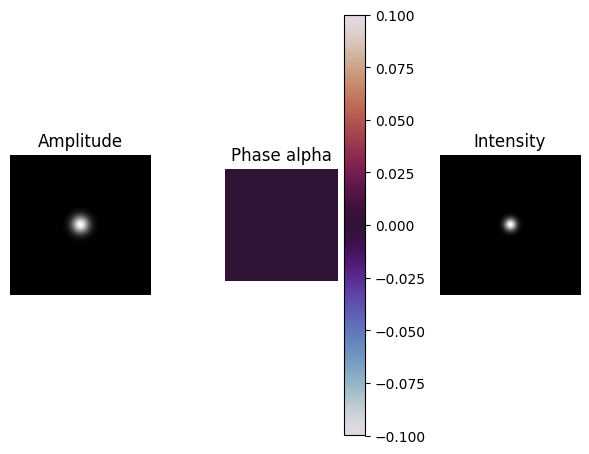

In [ ]:
"""
Define spatial grid
"""

N = 2**10 # pixel resolution
dx = 8e-6 # pixel size
x = np.linspace(-N/2*dx, N/2*dx, N) # spatial axis
y = np.linspace(-N/2*dx, N/2*dx, N) # spatial axis
[X, Y] = np.meshgrid(x, y) # spatial grid
Rho = np.sqrt(X**2 + Y**2) # radial coordinate
Phi = np.arctan2(Y, X) # angular coordinate

R_ap = (N/2) * dx       
rho = Rho / R_ap           
mask = rho <= 1

"""
Zernike function
"""
def R_nm(n, m, rho):
    R = np.zeros_like(rho)
    for k in range((n-m)//2+1):
        num = (-1)**k * math.factorial(n - k) / (math.factorial(k) * math.factorial((n + m)//2 - k) * math.factorial((n - m)//2 - k))
        R+= num * rho**(n - 2*k)
    return R
def Z_nm(n, m, rho, phi):
    Z = np.zeros_like(rho)
    if m>0:
        Z[mask] = R_nm(n, m, rho[mask]) * np.cos(m * phi[mask])
    elif m<0:
        Z[mask] = R_nm(n, -m, rho[mask]) * np.sin(-m * phi[mask])
    else:
        Z[mask] = R_nm(n, 0, rho[mask])
    return Z
"""
Define Gaussian field
"""

sigma = 5e-4   # width parameter 

U = np.exp(-(X**2 + Y**2) / sigma**2) # Gaussian field
Z = Z_nm(n=2, m=-2, rho=rho, phi=Phi) # Zernike phase
alpha = 2*np.pi
phase = alpha * Z 

U_complex = (U * mask) * np.exp(1j * phase) #


"""
Plot field
"""

plt.figure(figsize=(5,5))
plt.imshow(Z, cmap="coolwarm")
plt.colorbar(label="Phase")
plt.title("Zernike")
plt.axis("off")
plt.show()

plt.figure(figsize=(6,5))
plt.subplot(1,3,1)
plt.imshow(U*mask, cmap="gray")
plt.title("Amplitude")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(np.angle(U_complex), cmap="twilight")
plt.title("Phase alpha")
plt.axis("off")
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(np.abs(U_complex)**2, cmap="gray")
plt.title("Intensity")
plt.axis("off")

plt.tight_layout()
plt.show()

